In [5]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from time import time
import sys

import pyDOE

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
### FOR DATA REPRODUCTIBILITY
RANDOMSEED = 2662 

In [7]:
np.random.RandomState( np.random.seed(RANDOMSEED) ) ### fixe the random seed for testing

In [8]:
### PARAMETERS RANGE
range_deltaStar = [ np.log10(20.), np.log10(500.) ] ### in log
range_espilonSn = [ 0., 1. ] ### lin
range_espilonSF = [ np.log10(0.001), np.log10(0.03) ] ### lin: [ 0.001, 0.03 ], in log :[ np.log10(0.001), np.log10(0.03) ] = [-3, 1.52]

In [9]:
number_of_param = 3
number_of_points = 100 
LHS_sample = pyDOE.lhs( number_of_param, samples=number_of_points, criterion='m' ) ### LHS matrix, criterion= c, m, cm, corr

In [10]:
print( LHS_sample.shape )
param_sample = np.zeros( [number_of_points, 4] )
param_sample[:,0] = np.arange( number_of_points )
param_sample[:,1] = 10**( LHS_sample[:,0] * np.diff( range_deltaStar ) + range_deltaStar[0] )
param_sample[:,2] = LHS_sample[:,1] * np.diff( range_espilonSn ) + range_espilonSn[0]
param_sample[:,3] = 10**( LHS_sample[:,2] * np.diff( range_espilonSF ) + range_espilonSF[0] )

(100, 3)


In [11]:
file_name = 'SimSuit_LHS_grid.dat'
header = 'LHS sample of '+ str(number_of_points) +' points \n num delta* epsilon_SN epsilon_SF'
np.savetxt( file_name, param_sample, header=header, fmt='%.4f' )

<IPython.core.display.Javascript object>


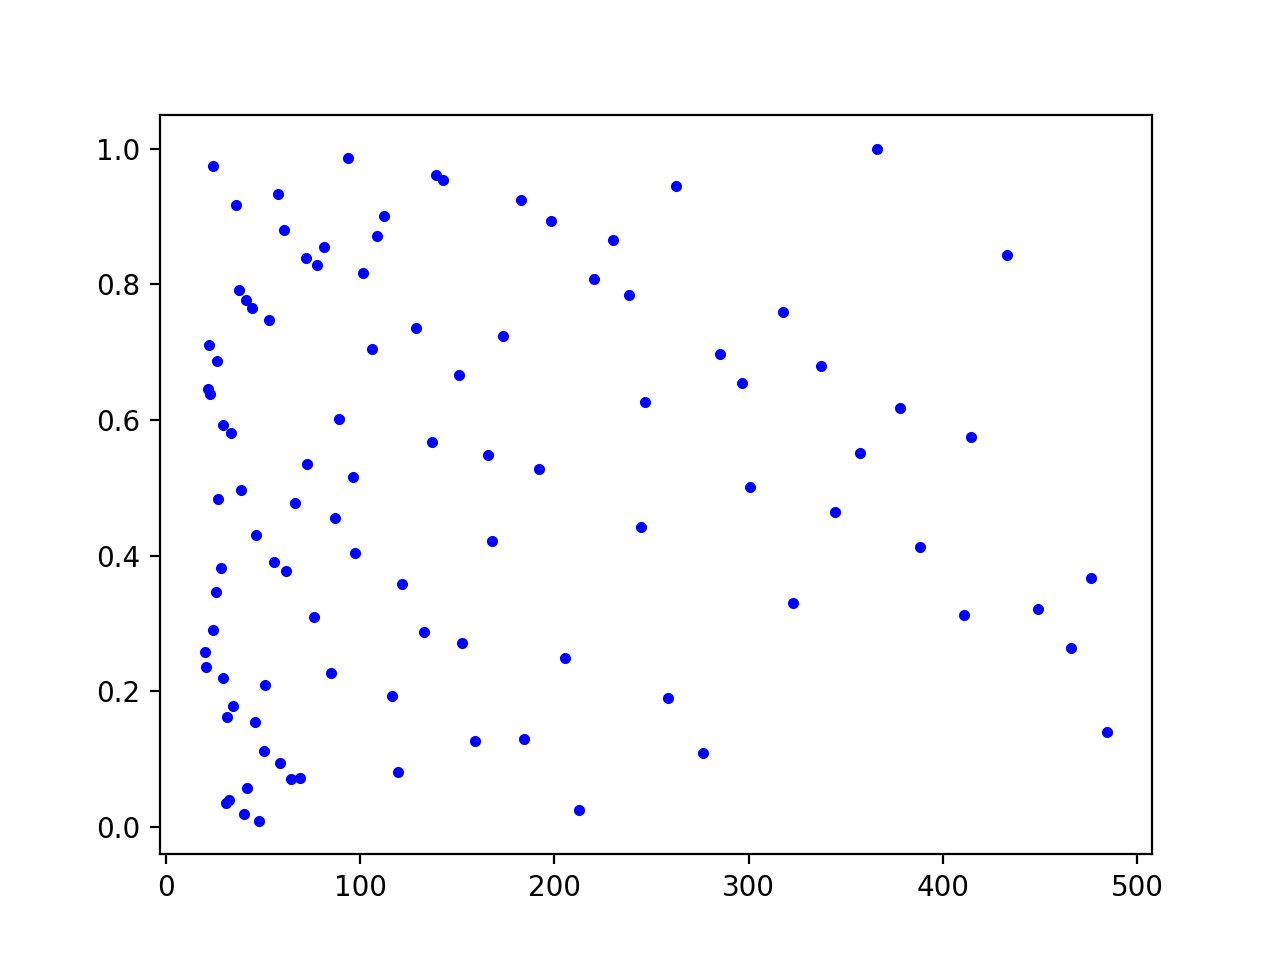

<IPython.core.display.Javascript object>


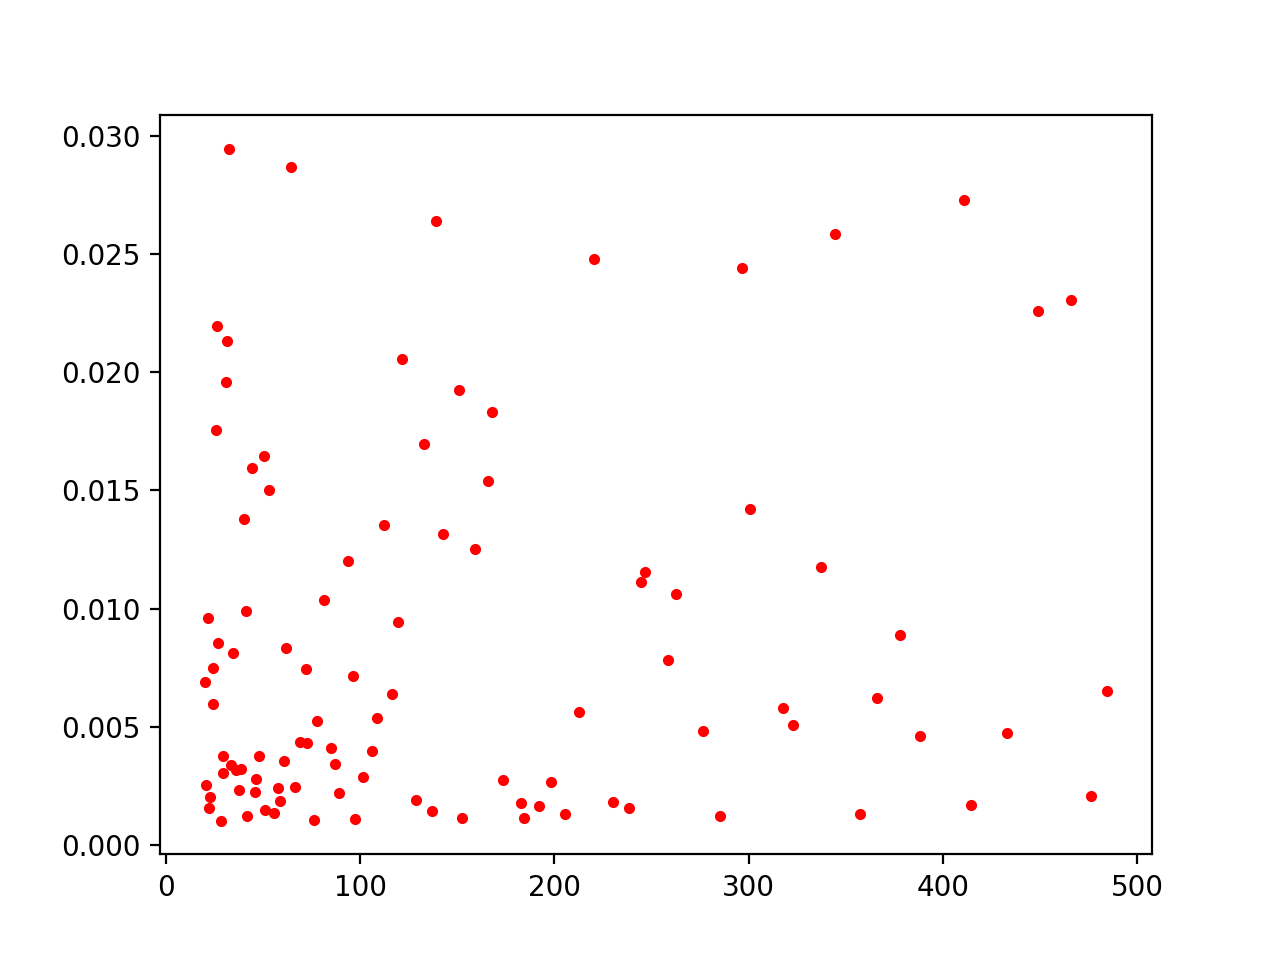

In [12]:
plt.figure()
plt.plot( param_sample[:,1], param_sample[:,2], 'b.' )
#plt.semilogx()
plt.figure()
plt.plot( param_sample[:,1], param_sample[:,3], 'r.' )
#plt.loglog()